### Booststrap
Suponga que tiene una muestra de tamaño $n$ de una distribución $F(x:\theta)$ y sea $F_{n}(x)$ de la distribución empírica de la muestra. Si $\check{\theta_{n}}$ es un estimador de $\theta$, una aplicación del método $bootstrap$ consiste en generar muestras de $F_{n}(x)$ para estimar el error estándar del estimador $\tilde{\theta_{n}}$. El algoritmo puede describirse como

1. Para $i\in J_{k}$, generar $\{x_{1}^{(i)}, \ldots, x_{n}^{(i)}\}$ observaciones independientes de $F_{n}(x)$.
2. Para $i\in J_{k}$, calcular $\tilde{\theta^{(i)}}=\tilde{\theta}(x_{1}^{(i)},\ldots, x_{n}^{(i)})$.

3. Calcular
$$
S_{k}=\sqrt{\frac{1}{k}\sum_{i=1}^{k}\left(\tilde{\theta^{(i)}}-\bar{\tilde{\theta}}\right)^{2}},
$$
donde 
$$
\bar{\tilde{\theta}}=\frac{1}{k}\sum_{i=1}^{k}\tilde{\theta^{(i)}}.
$$


In [1]:
import numpy as np
from random import choices 
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
n=30
s=np.random.poisson(3,n)
def muestras(m,n,s):
    lthetas=[]
    for i in range(m):
        x_bar=np.mean(choices(s,k=n))
        lthetas.append(x_bar)
    return lthetas  

In [3]:
def se(lthetas):
    m=len(lthetas)
    suma=sum([(i-np.mean(lthetas))**2 for i in lthetas])
    return(sp.sqrt((1/m)*suma))

In [7]:
m=1000
sample=muestras(m,n,s)
seb=se(sample)
sev=np.sqrt(np.var(s)/(n-1))
print('el error estandar Bootstrap es ', seb, 'el error estandar verdadero es ',sev)

el error estandar Bootstrap es  0.3401540762001179 el error estandar verdadero es  0.3501504876259268


Ahora calculemos el estimador máximo verosimil de $\theta$. Para esto consideremos la función 
$$
f(x_{1}, \ldots, x_{n}; \theta)=\prod_{i=1}^{n}\frac{\theta^{x_{i}}e^{-\theta}}{x_{i}!}=\frac{\theta^{\sum_{i=1}^{n} x_{i}}e^{-\theta n}}{\prod_{i=1}^{n}x_{i}!}.
$$
Luego
$$
\log(f(x_{1}, \ldots, x_{n}); \theta)=\left(\sum_{i=1}^{n} x_{i}\right)\log(\theta)-\theta n-\log\left(\prod_{i=1}^{n}x_{i}!\right),
$$
de este modo
$$
\frac{\partial \log(f(x_{1}, \ldots, x_{n}); \theta)}{\partial \theta}=\frac{\sum_{i=1}^{n} x_{i}}{\theta}-n, 
$$
entonces $\frac{\partial \log(f(x_{1}, \ldots, x_{n})}{\partial\theta}=0$ si $\theta=\frac{\sum_{i=1}^{n} x_{i}}{n}$. Consecuentemente el estimador máximo verosímil está dado por $\theta=\bar{x}$.

Luego surge la siguiente cuestión ¿cómo se calcularía un intervalo al $90\%$ de confianza para $\theta$? Respondamos pues a esta pregunta.

Sabemos que si $x_{1}, \ldots, x_{n}$ es una muestra $Po(\lambda)$, entonces el intervalo de confianza está dado por 
\begin{equation}
P\left(\bar{x}-\sqrt{\frac{\bar{x}}{n}}Z_{1-\frac{\alpha}{2}}\leq \lambda\leq\bar{x}-\sqrt{\frac{\bar{x}}{n}}Z_{1-\frac{\alpha}{2}}\right)=1-\alpha.    \ \      \ \     Ec(1)
\end{equation}
De este modo, con la información que tenemos, en la ec(1) en lugar de usar $\sqrt{\frac{\bar{x}}{n}}$ usaremos el error estándar que obtuvimos con el método bootstrap.

In [9]:
k=200
alpha=0.1
mat=np.zeros((k,3))
z_a=stats.norm.ppf(1-alpha/2)
s=np.random.poisson(3,n)
for i in range(k):
    sample=muestras(k,n,s)
    serror=se(sample)
    s0=np.random.poisson(3,n)
    mat[i,0]=np.mean(s0)
    mat[i,1]=np.mean(s0)-z_a*serror
    mat[i,2]=np.mean(s0)+z_a*serror

In [26]:
l=[i for i in range(k)]
num=k-1

In [11]:
lines=[[(i,k),(j,k)] for i,j,k in zip(mat[:,1],mat[:,2],l)]
med=[[(3,0),(3,num)]]
c=[(0,0,1,1) if (i<=3 and 3<=j) else (1,0,0,1) for i,j in zip(mat[:,1],mat[:,2])]

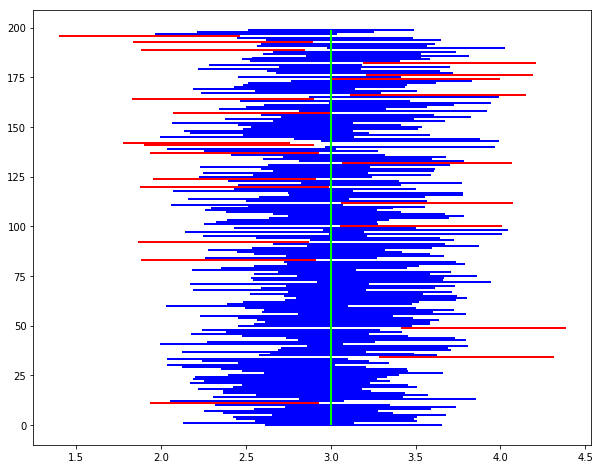

In [25]:
lc=LineCollection(lines,color=c,linewidths=2)
ld=LineCollection(med,color=[0, 1, 0, 1],linewidths=2)
fig,ax=plt.subplots(figsize=(10,8))
ax.add_collection(lc)
ax.add_collection(ld)
ax.autoscale()
ax.margins(0.05)